# Pymaceuticals Inc.
---

### Analysis

In this project, I analyzed data from a pre-clinical study of potential treatments for squamous cell carcinoma (SCC). The study involved 249 mice, which were randomly divided into 10 different treatment regimens. I analyzed the data using Python and the Pandas, Matplotlib, and Scipy libraries.

My analysis started with cleaning and preprocessing the data, which involved removing duplicates, missing values, and irrelevant columns. I then generated a summary statistics table that included the mean, median, variance, standard deviation, and SEM for the tumor volume of each drug regimen. I also generated a bar plot that showed the number of mice in each treatment regimen.

Next, I analyzed the data for a single mouse treated with Capomulin and generated a line plot of tumor volume vs. time point. I also generated a scatter plot that showed the relationship between mouse weight and average tumor volume for the Capomulin regimen, and calculated the correlation coefficient and linear regression model for the two variables.

My analysis showed that Capomulin was one of the most promising treatments for SCC, with the lowest tumor volume among all the drug regimens. I also found a strong positive correlation between mouse weight and tumor volume, which may indicate that the drug is less effective in larger mice.

Overall, this project demonstrates the importance of data cleaning and preprocessing, as well as statistical analysis, in making meaningful conclusions from scientific data. It also highlights the usefulness of Python and its libraries in facilitating data analysis and visualization.






 

In [219]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
py_df= pd.merge(study_results,mouse_metadata,on= "Mouse ID", how="outer")

# Display the data table for preview
py_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [36]:
py_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [37]:
# Checking the number of mice.
py_df["Mouse ID"].nunique()


249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = py_df[py_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicates['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [40]:
# Optional: Get all the data for the duplicate mouse ID.
mask=py_df['Mouse ID'] =='g989'
duplicatemouse=py_df[mask]
duplicatemouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = py_df.drop_duplicates("Mouse ID")
clean_df.reset_index(drop=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()


249

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by drug regimen and calculate the required statistics
# Calculate mean, median, variance, standard deviation, and standard error of the mean
# Calculate mean, median, variance, standard deviation, and standard error of the mean
grouped_df= py_df.groupby("Drug Regimen")

mean= grouped_df['Tumor Volume (mm3)'].mean()
median=grouped_df['Tumor Volume (mm3)'].median()
variance=grouped_df['Tumor Volume (mm3)'].var()
std_dev=grouped_df['Tumor Volume (mm3)'].std()
std_error=grouped_df['Tumor Volume (mm3)'].sem()

# Create a dictionary to store the summary statistics
summary_stats = {
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': std_error
}

summary_stats_df=pd.DataFrame(summary_stats)

# Print the summary statistics table
summary_stats_df.head(6)



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
# Group the data by drug regimen and calculate the required statistics
summary_stats = py_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})



# Rename the columns for better clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})



# Print the summary statistics table
summary_stats



Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.322552           50.854632             42.351070   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.507770               0.512884  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

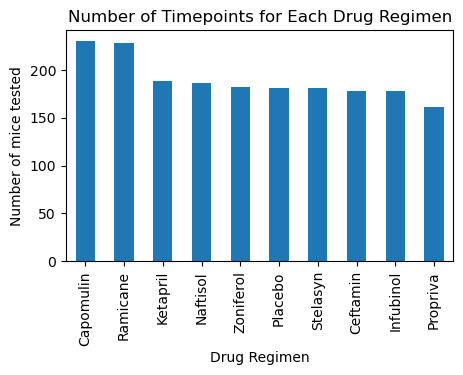

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


# Group the data by drug regimen and count the number of timepoints
timepoints = py_df.groupby('Drug Regimen')['Timepoint'].count()

#sort the values
timepoints=timepoints.sort_values(ascending= False)

# Create a bar plot using Pandas
timepoints.plot(kind='bar', figsize=(5,3))

# Set the title and axis labels
plt.title('Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice tested')

# Display the plot
plt.show()


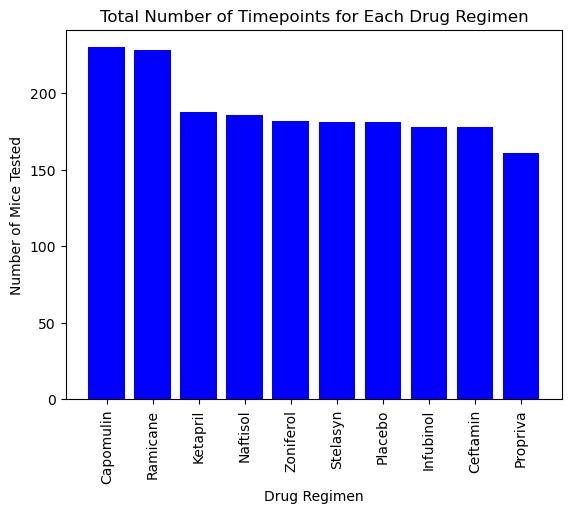

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


# Calculate the total number of timepoints for each drug regimen
timepoints = py_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(timepoints))

# Create a bar plot
plt.bar(x_axis, timepoints, color='b', align="center")

# Set the x-axis tick labels
plt.xticks(x_axis, timepoints.index, rotation=90)

# Set the x-axis label
plt.xlabel('Drug Regimen')

# Set the y-axis label
plt.ylabel('Number of Mice Tested')


# Set the plot title
plt.title('Total Number of Timepoints for Each Drug Regimen')

# Show the plot
plt.show()


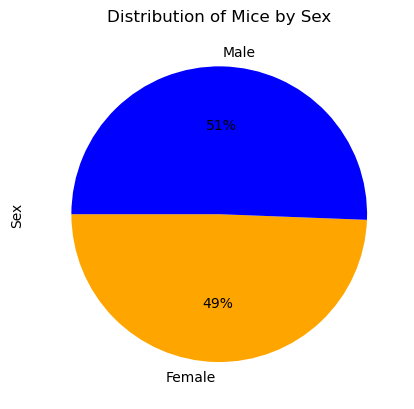

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the data by sex and count the number of mice
sex_counts = py_df.groupby('Sex')['Mouse ID'].count()

# Create a pie plot using Pandas
sex_counts.plot(kind='pie', autopct='%.0f%%', startangle=180, colors=['orange','blue'])

# Set the title
plt.title('Distribution of Mice by Sex')

# Set the y-label
plt.ylabel('Sex')

# Display the plot
plt.show()


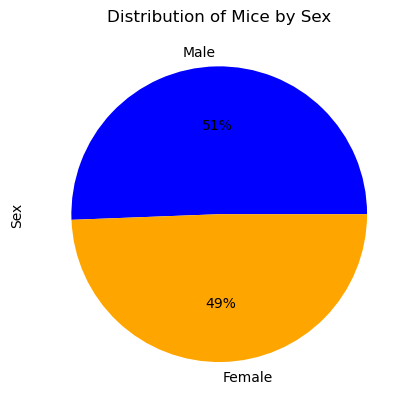

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of mice by sex
sex_counts = py_df['Sex'].value_counts()

# Set the labels for the pie chart
labels = sex_counts.index


# Generate the pie chart using pyplot
plt.pie(sex_counts, labels=labels, colors=['blue','orange'],autopct='%.0f%%', startangle=0)

# Set the title
plt.title('Distribution of Mice by Sex')

# Set the y-label
plt.ylabel('Sex')

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [165]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Reset the index of the last_timepoint dataframe
last_timepoint = last_timepoint.reset_index()

# Merge the last_timepoint dataframe with the original dataframe
merged_df = pd.merge(tumor_df, last_timepoint, on=['Mouse ID', 'Timepoint'])

# Select only the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_df = merged_df.loc[merged_df['Drug Regimen'].isin(treatment_regimens)]

# Display the final dataframe
final_tumor_df.reset_index(drop=True).head()
#final_tumor_df.head()


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),level_0,index
0,b128,Capomulin,45,38.982878,19,19
1,c326,Infubinol,5,36.321346,31,31
2,c139,Infubinol,45,72.226731,27,27
3,v339,Infubinol,5,46.250112,198,198
4,a577,Infubinol,30,57.031862,11,11


In [167]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Loop through treatments to calculate potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment]
    volumes = treatment_df['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volumes.append(volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Get potential outliers
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


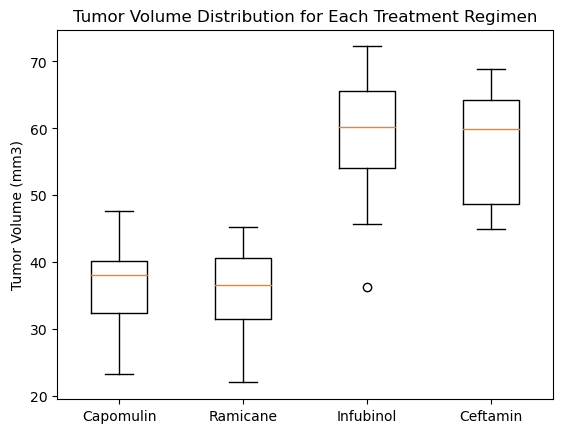

In [173]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of lists containing the tumor volume for each treatment regimen
data = [final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatments]

# Set up the figure and axes
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(data)

# Add labels and title
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Volume Distribution for Each Treatment Regimen')

# Show the plot
plt.show()





## Line and Scatter Plots

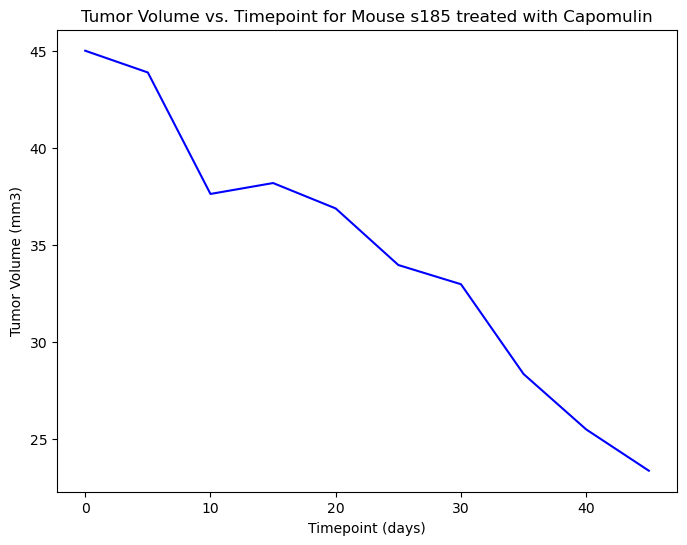

In [206]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


# Set the figure size
plt.figure(figsize=(8,6))

# Get the data for a single mouse treated with Capomulin
mouse_id = 's185'
mouse_data = tumor_df.loc[(tumor_df['Drug Regimen'] == 'Capomulin') & (tumor_df['Mouse ID'] == mouse_id)]

# Generate the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue')

# Set the x-axis and y-axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the title of the plot
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} treated with Capomulin')

# Show the plot
plt.show()









In [210]:
tumor_df.head(2)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,0,45.000000
1,b128,Capomulin,5,45.651331


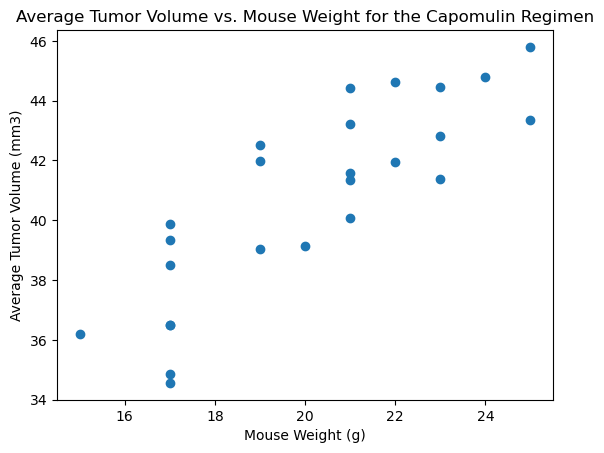

In [215]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Group the data by Mouse ID and Drug Regimen
capomulin_data = py_df[py_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')

# Calculate the average tumor volume and mouse weight for each mouse
average_tumor_vol = capomulin_data['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data['Weight (g)'].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_vol)

# Set the x-axis and y-axis labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Set the title of the plot
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

# Show the plot
plt.show()




## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


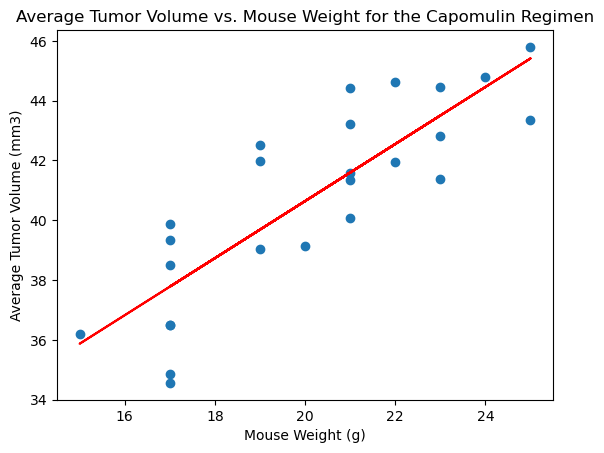

In [220]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = average_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation_coefficient=round(st.pearsonr(mouse_weight, average_tumor_vol)[0],2)
# Print the correlation coefficient
print(f'The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient}')


# Generate the scatter plot with the linear regression line
plt.scatter(mouse_weight, average_tumor_vol)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()